# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


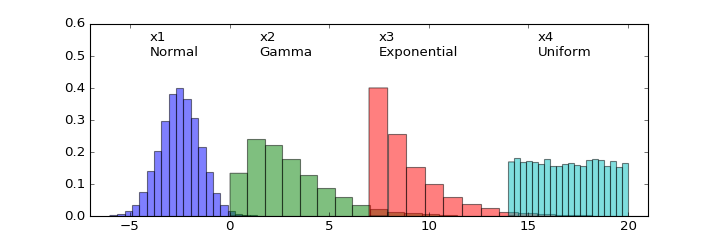

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

#plt.gca().set_title('Sampling the Normal Distribution')

<IPython.core.display.Javascript object>


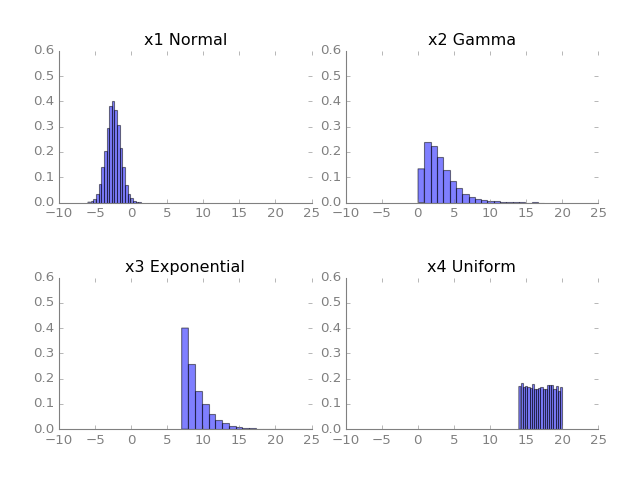

In [2]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, sharex=True, sharey = True)

axs = [ax1,ax2,ax3,ax4]

ax1.hist(x1, normed=True, bins=20, alpha=0.5)
ax2.hist(x2, normed=True, bins=20, alpha=0.5)
ax3.hist(x3, normed=True, bins=20, alpha=0.5)
ax4.hist(x4, normed=True, bins=20, alpha=0.5)

ax1.set_title('x1 Normal')
ax2.set_title('x2 Gamma')
ax3.set_title('x3 Exponential')
ax4.set_title('x4 Uniform')

for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)
        
for ax in axs:
    ax.set_xlim(-10,25)
    ax.set_ylim(0,0.5)

for a in axs:
    #set not visible frame borders at right and top (рамки на графиках)
    a.spines['right'].set_visible(False)
    a.spines['top'].set_visible(False)
    a.spines['left'].set_color('grey')
    a.spines['bottom'].set_color('grey')
    a.tick_params(color='grey')
    plt.setp(a.get_xticklabels(), color='grey')
    plt.setp(a.get_yticklabels(), color='grey')
    a.set_ylim(0,0.6)

#The Names of subplots allign on each other so set a space between them
fig.subplots_adjust(hspace=0.3, wspace=0.25)
plt.tight_layout(pad=2.5, w_pad=0, h_pad=3.0)

In [3]:
n=200
x1 = np.random.normal(-2.5, 1, n)
x2 = np.random.gamma(2, 1.5, n)
x3 = np.random.exponential(2, n)+7
x4 = np.random.uniform(14,20, n)

In [4]:
#Create a separate intervals for each graph (+- 3 std)
minx=[0,0,0,0]
maxx=[0,0,0,0]
x=[x1,x2,x3,x4]
for i in range(len(minx)):
    minx[i] = int(x[i].mean() - 3*x[i].std())
    maxx[i] = int(x[i].mean() + 3*x[i].std())

In [5]:
def update(curr):
# check if animation is at the last frame, and if so, stop the animation a\n",
    if curr==n:
        a.event_source.stop()
    for i,ax in enumerate(axs):
        ax.clear()
        ax.set_ylim(0,0.6)
        ax.set_xlim(minx[i],maxx[i])
    for a in axs:
        a.spines['right'].set_visible(False)
        a.spines['top'].set_visible(False)
        a.spines['left'].set_color('grey')
        a.spines['bottom'].set_color('grey')
        a.tick_params(color='grey')
        plt.setp(a.get_xticklabels(), color='grey')
        plt.setp(a.get_yticklabels(), color='grey')
        a.set_ylim(0,0.6)
    ax1.set_title('x1 Normal')
    ax2.set_title('x2 Gamma')
    ax3.set_title('x3 Exponential')
    ax4.set_title('x4 Uniform')
    ax1.hist(x1[:curr], normed=True, bins=10, color='blue', alpha=0.5)
    ax2.hist(x2[:curr], normed=True, bins=10, color='red', alpha=0.5)
    ax3.hist(x3[:curr], normed=True, bins=10, color='green', alpha=0.5)
    ax4.hist(x4[:curr], normed=True, bins=10, color='orange', alpha=0.5)
    plt.tight_layout(pad=2.5, w_pad=0, h_pad=3.0)
    ax2.annotate('n = {}'.format(curr), [maxx[1]-1.5,0.5])

<IPython.core.display.Javascript object>


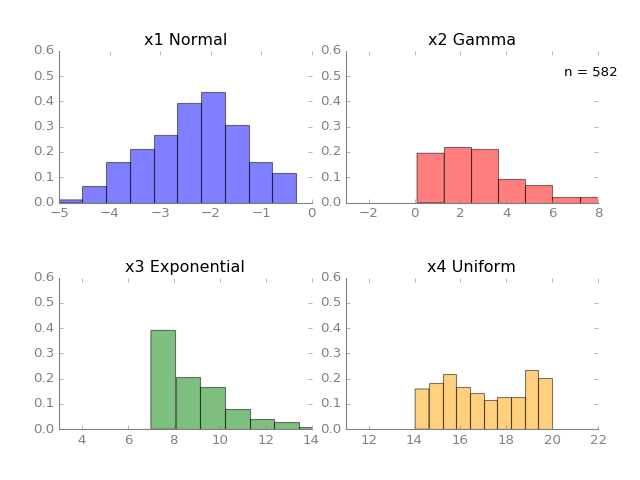

In [6]:
import matplotlib.animation as animation
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, sharey = True)
fig.subplots_adjust(hspace=0.3, wspace=0.25)
plt.tight_layout(pad=2.5, w_pad=0, h_pad=3.0)
axs = [ax1,ax2,ax3,ax4]
a = animation.FuncAnimation(fig, update, interval=100)